In [6]:
import os
import pickle

root_dir = '/home/jxm3/random/interpretable-autoprompting/'

hotflip_indices = pickle.load(open(os.path.join(root_dir, 'hotflip_grad_indices.p'), 'rb'))
hotflip_values = pickle.load(open(os.path.join(root_dir, 'hotflip_grad_values.p'), 'rb'))
hotflip_losses = pickle.load(open(os.path.join(root_dir, 'hotflip_losses.p'), 'rb'))

In [9]:
import pandas as pd

df = pd.DataFrame(zip(hotflip_indices, hotflip_values, hotflip_losses), columns=['token_idx', 'grad_value', 'loss'])
df.head()

,token_idx,grad_value,loss
0,37633,-0.759008,28.759841
1,19510,-0.713214,28.386833
2,861,-0.693773,28.453197
3,33096,-0.663077,28.686625
4,41359,-0.643015,28.380645


[Text(0.5, 0, 'gradient wrt word'),
 Text(0, 0.5, 'actual loss when word is substituted')]

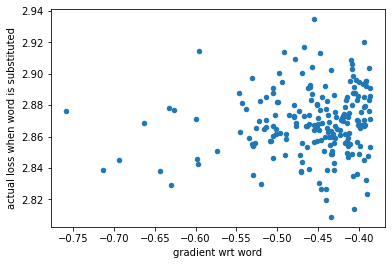

In [25]:
import math

df['loss_scaled'] = df['loss'] / 10
ax = df.plot(x='grad_value', y='loss_scaled', kind='scatter', logx=False, logy=False)
ax.set(xlabel="gradient wrt word", ylabel="actual loss when word is substituted")